In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
path_ages = "data/plots/tehpra_ltrs_classified_ages_new_09_04_19.tsv"
path_parts = "data/plots/Stuberosum_genome_parts.gff3"

In [3]:
df_genome_parts = pd.read_csv(path_parts, sep='\t')
df_genome_parts.columns = ['seqname' , 'source' , 'feature' , 'start' , 'end' , 'score' , 'strand' , 'frame' , 'attribute']
print(len(df_genome_parts.index))
df_genome_parts.head(2)

35


,seqname,source,feature,start,end,score,strand,frame,attribute
0,chr01,.,heterochromatin,4500001.0,34000000.0,.,0.0,.,.
1,chr01,.,euchromatin,34000001.0,88663952.0,.,0.0,.,.


In [4]:
df_ages = pd.read_csv(path_ages, sep='\t')
print(len(df_ages.index))
df_ages.head(2)

27591


,ID,Divergence,Age,Ts:Tv
0,RLC_family0_LTR_retrotransposon248_chr00_43732...,0.0775,3875000,11.0785
1,RLC_family0_LTR_retrotransposon829_chr00_19719...,0.0611,3055000,9.7319


In [5]:
df_ages['seqname'] = df_ages['ID'].str.split('_').str[-3:-2].str[0]
df_ages['start'] = df_ages['ID'].str.split('_').str[-2:-1].str[0]
df_ages['end'] = df_ages['ID'].str.split('_').str[-1:].str[0]
df_ages['start'] = pd.to_numeric(df_ages['start'])
df_ages['end'] = pd.to_numeric(df_ages['end'])

In [6]:
df_ages.sample(3)

,ID,Divergence,Age,Ts:Tv,seqname,start,end
2517,RLC_singleton_family1162_LTR_retrotransposon17...,0.0297,1485000,2.4242,chr10,48582613,48585493
5063,RLG_family349_LTR_retrotransposon16746_chr10_2...,0.0702,3510000,2.5635,chr10,26677591,26692901
4707,RLG_family240_LTR_retrotransposon1933_chr01_17...,0.0811,4055000,2.7012,chr01,17415441,17430435


In [7]:
#ADJUST VALUES HERE

In [243]:
### what = 'RLG'
what = 'RLX'
ylim = 650
where = 'heterochromatin'
#where = 'euchromatin'
#what = 'RLC'

In [244]:
df_genome_parts_now = df_genome_parts[df_genome_parts.feature == where]
print(len(df_genome_parts_now.index))
df_genome_parts_now.head(3)

12


,seqname,source,feature,start,end,score,strand,frame,attribute
0,chr01,.,heterochromatin,4500001.0,34000000.0,.,0.0,.,.
2,chr02,.,heterochromatin,0.0,14000000.0,.,0.0,.,.
5,chr03,.,heterochromatin,4500001.0,23000000.0,.,0.0,.,.


In [245]:
df_ages_now = df_ages[df_ages.ID.str.contains(what)]
print(len(df_ages_now.index))
df_ages_now.head(3)

20053


,ID,Divergence,Age,Ts:Tv,seqname,start,end
7538,RLX_family0_LARD_retrotransposon124_chr00_2127...,0.0628,3140000,1.4847,chr00,2127506,2129356
7539,RLX_family0_LARD_retrotransposon128_chr00_2431...,0.1324,6620000,5.6566,chr00,2431940,2434946
7540,RLX_family0_LARD_retrotransposon352_chr00_1458...,0.0176,880000,1.0000,chr00,14586054,14587550


In [246]:
saved = []
for k,v in df_genome_parts_now.iterrows():
    df_filter = df_ages_now[(df_ages_now.seqname == v.seqname) &
                            (df_ages_now.start <= v.end) &
                            (df_ages_now.end >= v.start) ]
    saved.append(df_filter)
df_res = pd.concat(saved)

In [247]:
print(len(df_res.index))

7079


In [248]:
print(len(df_res.ID.unique()))

7079


In [249]:
path_save = 'data/plots/%s_%s' % (what, where)
df_res.to_csv(path_save + '.csv', index=None)

In [250]:
x = (df_res.Age / 1000000).tolist()

'data/plots/RLX_heterochromatin'

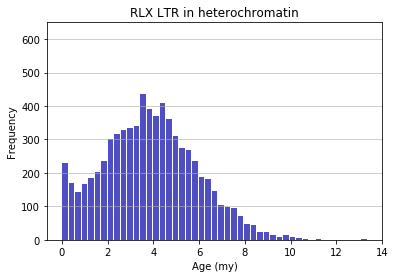

In [251]:
# An "interface" to matplotlib.axes.Axes.hist() method
fig = plt.figure()
n, bins, patches = plt.hist(x=x, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age (my)')
plt.ylabel('Frequency')
plt.title('%s LTR in %s' % (what, where))
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim([0,ylim])
fig.savefig(path_save + '.svg', dpi=fig.dpi)
path_save